In [57]:
import pandas as pd 
import matplotlib.pyplot as plt

data=pd.read_csv('Salaries.csv')
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# task 1

In [58]:

data_shape=data.shape
print(f'the numper of rows is{data_shape[0]},and the numper of coulmn is {data_shape[1]} \n')
#check for the datatypes of each column
data_dtypes=data.dtypes 
print(data_dtypes)
#find how many null values for each column there is in dataframe python 
data_null_count=data.isnull().sum()
print(data_null_count)


the numper of rows is148654,and the numper of coulmn is 13 

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# task 2

In [59]:

Descriptive_Statistics=data['TotalPay'].describe()
Descriptive_Statistics.rename(index={'50%': 'median'}, inplace=True)
data_mode=data['TotalPay'].mode()
data_range=data['TotalPay'].max()-data['TotalPay'].min()


print(f'range     {data_range}')
print(f'mode      {data_mode[0]}')
print(Descriptive_Statistics)


range     568213.56
mode      0.0
count     148654.000000
mean       74768.321972
std        50517.005274
min         -618.130000
25%        36168.995000
median     71426.610000
75%       105839.135000
max       567595.430000
Name: TotalPay, dtype: float64


# task 3

In [60]:

# drop the coulmns if all the values in the coulmn are null values
coulmns_to_drop = ['Status', 'Notes']
data = data.drop(coulmns_to_drop, axis=1)

print(data[data['OvertimePay'].isnull()&data['OtherPay'].isnull()])
# decided to drop the rows with null values in the coulmn OvertimePay and OtherPay because the information is not important
data = data.dropna(subset=['OvertimePay', 'OtherPay'])   

#replace the null values in the coulmn benefits with TotalPayBenefits - TotalPay
data['Benefits'] = data['Benefits'].fillna(data['TotalPayBenefits']-data['TotalPay'])
#replace the null values in the coulmn base pay with Total pay - (OtherPay+OverTimePay) 
data['BasePay'] = data['BasePay'].fillna(data['TotalPay'] - (data['OtherPay'] + data['OvertimePay']))
data_null_count=data.isnull().sum()
print(data_null_count)
print(data.shape)








            Id  EmployeeName      JobTitle  BasePay  OvertimePay  OtherPay  \
148646  148647  Not provided  Not provided      NaN          NaN       NaN   
148650  148651  Not provided  Not provided      NaN          NaN       NaN   
148651  148652  Not provided  Not provided      NaN          NaN       NaN   
148652  148653  Not provided  Not provided      NaN          NaN       NaN   

        Benefits  TotalPay  TotalPayBenefits  Year         Agency  
148646       NaN       0.0               0.0  2014  San Francisco  
148650       NaN       0.0               0.0  2014  San Francisco  
148651       NaN       0.0               0.0  2014  San Francisco  
148652       NaN       0.0               0.0  2014  San Francisco  
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64
(148650, 11)


# task 4

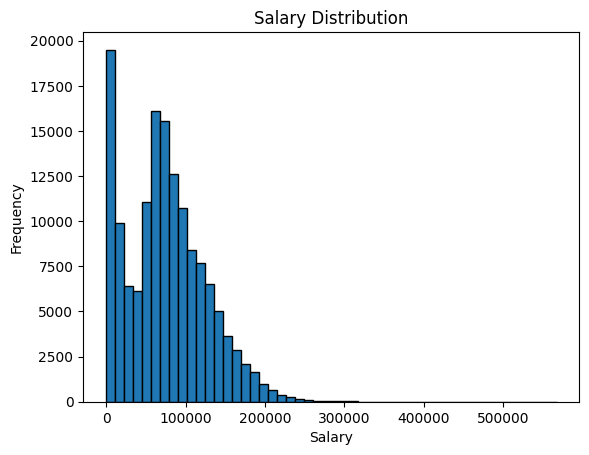

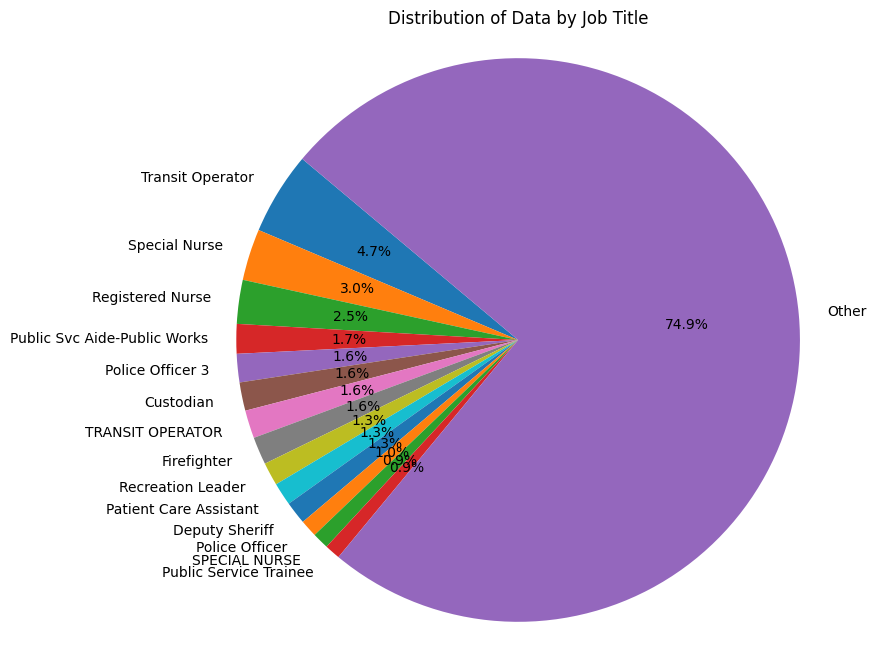

JobTitle
Transit Operator                  7036
Special Nurse                     4389
Registered Nurse                  3736
Public Svc Aide-Public Works      2518
Police Officer 3                  2421
Custodian                         2418
TRANSIT OPERATOR                  2388
Firefighter                       2359
Recreation Leader                 1971
Patient Care Assistant            1945
Deputy Sheriff                    1933
Police Officer                    1476
SPECIAL NURSE                     1402
Public Service Trainee            1328
Other                           111330
Name: count, dtype: int64


In [61]:
# bar charts to visualize the distribution of salaries




plt.hist(data['TotalPay'], bins=50, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
job_title_counts = data['JobTitle'].value_counts()


# Group values with count less than 200 into 'Other'
threshold = 1300
other_count = job_title_counts[job_title_counts < threshold].sum()
job_title_counts = job_title_counts[job_title_counts >= threshold]
job_title_counts['Other'] = other_count

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data by Job Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(job_title_counts)







# task 5

In [62]:
print(data.groupby(['Year']).describe())
print('==================================================')
print(data.groupby(['Year'])['TotalPay'].mean())


           Id                                                              \
        count           mean           std       min        25%       50%   
Year                                                                        
2011  36159.0   18080.000000  10438.348528       1.0    9040.50   18080.0   
2012  36766.0   54542.500000  10613.574335   36160.0   45351.25   54542.5   
2013  37606.0   91728.500000  10856.061448   72926.0   82327.25   91728.5   
2014  38119.0  129591.000184  11004.152110  110532.0  120061.50  129591.0   

                           BasePay                ...   TotalPay             \
            75%       max    count          mean  ...        75%        max   
Year                                              ...                         
2011   27119.50   36159.0  36159.0  63595.956517  ...  102512.68  567595.43   
2012   63733.75   72925.0  36766.0  65436.406857  ...  104099.17  362844.66   
2013  101129.75  110531.0  37606.0  68509.832156  ...  109637.67 

# task 6

BasePay             0.954690
OvertimePay         0.504859
OtherPay            0.470496
Benefits            0.632187
TotalPay            1.000000
TotalPayBenefits    0.977312
Year                0.032145
Name: TotalPay, dtype: float64


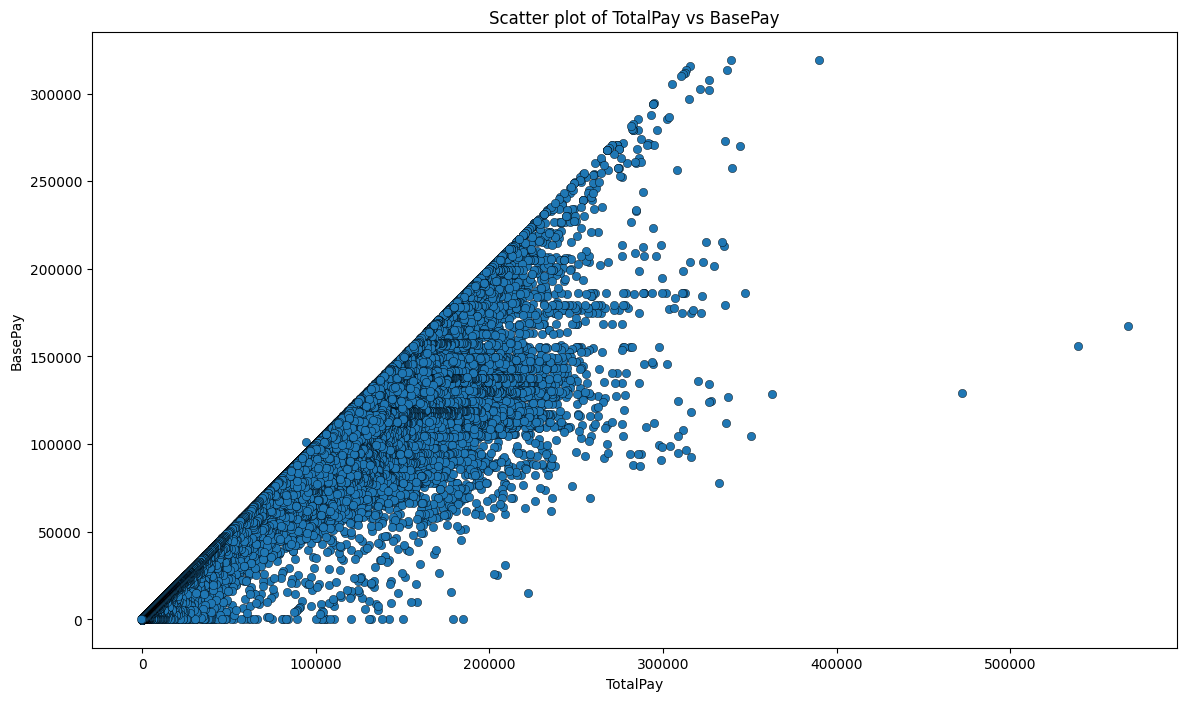

In [63]:
data_copy=data.copy()
data_copy=data_copy.drop(columns=['Id', 'JobTitle', 'EmployeeName', 'Agency'])
correlation_matrix = data_copy.corr()
print(correlation_matrix['TotalPay'])

# Print correlation of 'BasePay' and 'TotalPayBenefits' with other attributes
plt.figure(figsize=(14, 8))
plt.scatter(data_copy['TotalPay'], data_copy['BasePay'],edgecolor='black', linewidth=0.3)
plt.title('Scatter plot of TotalPay vs BasePay')
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.show()

plt.show()